# Lesson 29: PyTorch neural network demonstration part 2

In this notebook, we build a deep neural network (DNN) classifier for the CIFAR-10 dataset using PyTorch's `nn.Sequential` module. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes. We convert the images to grayscale (single channel) and use only fully connected layers (no convolution or pooling) to demonstrate the fundamentals of deep learning classification.

## Notebook set-up

### Imports

In [1]:
# Standard library imports
from pathlib import Path

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set random seeds for reproducibility
torch.manual_seed(315)
np.random.seed(315)

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


### Hyperparameters

In [12]:
batch_size = 10000 # Images come in batches of 10,000 already
learning_rate = 1e-2
epochs = 50
print_every = 5 # Print training progress every n epochs

## 1. Load and preprocess CIFAR-10 data

CIFAR-10 contains 32x32 color images (3 channels) across 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. We convert the images to grayscale for this demonstration.

### 1.1. Define transformations

In [3]:
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5)),
    transforms.Grayscale(num_output_channels=1)
])

### 1.2. Load datasets

In [4]:
# Create directory for image data
data_dir = Path('./data')
data_dir.mkdir(parents=True, exist_ok=True)

In [7]:
# Load images with PyTorch datasets
train_dataset = datasets.CIFAR10(
    root=data_dir,
    train=True,
    download=True,
    transform=transformations
)

test_dataset = datasets.CIFAR10(
    root=data_dir,
    train=False,
    download=True,
    transform=transformations
)

### 1.3. Pre-load data and create data loaders

In [8]:
# Create tensors and move to GPU
x_train_full = torch.stack([img for img, _ in train_dataset]).to(device)
y_train_full = torch.tensor([label for _, label in train_dataset]).to(device)

x_test = torch.stack([img for img, _ in test_dataset]).to(device)
y_test = torch.tensor([label for _, label in test_dataset]).to(device)

In [9]:
# Training validation split
n_train = int(0.8 * len(x_train_full))
indices = torch.randperm(len(x_train_full))

x_train = x_train_full[indices[:n_train]]
y_train = y_train_full[indices[:n_train]]

x_val = x_train_full[indices[n_train:]]
y_val = y_train_full[indices[n_train:]]

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: torch.Size([40000, 1, 32, 32])
y_train shape: torch.Size([40000])


In [13]:
train_tensor_dataset = torch.utils.data.TensorDataset(x_train, y_train)
val_tensor_dataset = torch.utils.data.TensorDataset(x_val, y_val)

train_loader = DataLoader(
    train_tensor_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_loader = DataLoader(
    val_tensor_dataset,
    batch_size=batch_size,
    shuffle=False
)

### 1.4. Visualize sample images

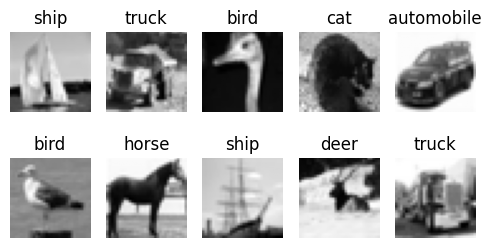

In [18]:
# Define class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

images, labels = next(iter(train_loader))

fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = images[i].cpu() * 0.5 + 0.5
    img = img.numpy().squeeze()
    ax.set_title(class_names[labels[i]])
    ax.imshow(img, cmap='gray')
    ax.axis('off')

## 2. Build DNN classifier with nn.Sequential

We build a fully connected deep neural network using `nn.Sequential`. Since we are not using convolutional layers, we flatten the 32x32x1 grayscale images into a 1024-dimensional vector.

### 2.1. Define model architecture

### 2.2. Define loss function and optimizer

### 2.3. Define training function

### 2.4. Train model

### 2.5. Learning curves

## 3. Evaluate model on test set

### 3.1. Calculate test accuracy

### 3.4. Confusion matrix